In [1]:
import os, sys
sys.path.insert(0,"/projects/QUIJOTE/Neerav/UNIVERSAL")
import pandas as pd
import numpy as np
import MAS_library as MASL
import Pk_library as PKL
import matplotlib.pyplot as plt
import sys,os,h5py
import readsnap, readgadget
import time
import threading
from mpl_toolkits.axes_grid1 import make_axes_locatable
from my_routines import get_runtime
from pylab import *
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.colors import LogNorm

In [2]:
def get_mean(arr):
    return np.mean(arr, axis=0)

def get_std(arr):
    return np.std(arr, axis=0)

def get_tk(pk_X, base, order=1.0):
    return (pk_X/base)**order

def get_unexplained_variance(arr):
    return 1-arr**2

In [3]:
path = "test_results/"
K = np.load(path+"K.npy")

PK_quij = np.load(path+"PK_quij.npy")
PK_cpc  = np.load(path+"PK_cpc.npy")
PK_zpz  = np.load(path+"PK_zpz.npy")
R_c2q   = np.load(path+"R_cpc_quij.npy")
R_z2q   = np.load(path+"R_zpz_quij.npy")

print("Data shape:", K.shape)

Data shape: (100, 443)


#### Transfer function 

In [4]:
myorder = 0.5
TK_cpc  = get_tk(PK_cpc, PK_quij, order=myorder)
TK_zpz  = get_tk(PK_zpz, PK_quij, order=myorder)
mTK_cpc = get_mean(TK_cpc)
sTK_cpc = get_std(TK_cpc)
mTK_zpz = get_mean(TK_zpz)
sTK_zpz = get_std(TK_zpz)

cf_c2q = get_unexplained_variance(R_c2q)
cf_z2q = get_unexplained_variance(R_z2q)
mean_cf_c2q = get_mean(cf_c2q)
mean_cf_z2q = get_mean(cf_z2q)

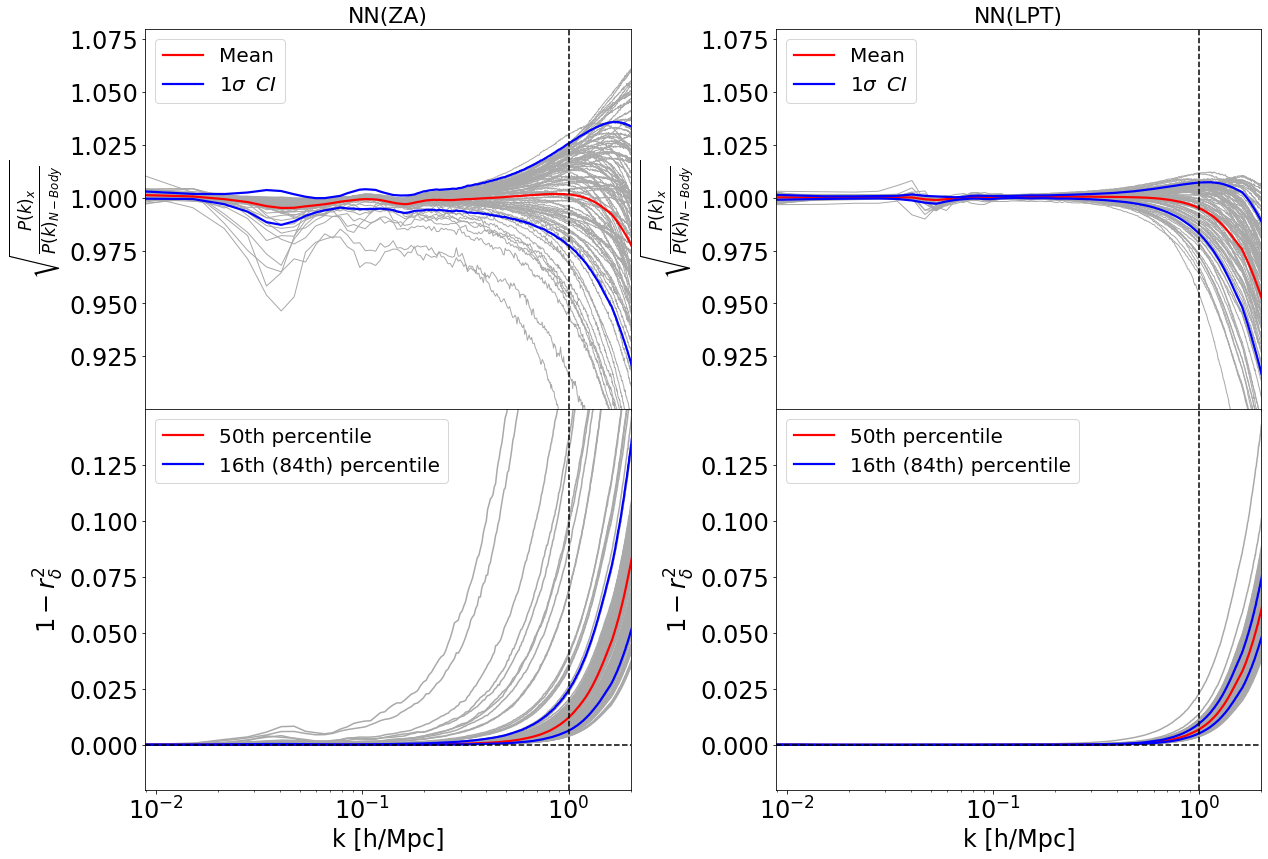

In [12]:
mylw = 2.2
xlimdist = 2.0
ticklabelsize = 24
axeslabelsize = 24
legendsize=20
titlesize=22

#---path to save graphs
path_to_save='/scratch/gpfs/QUIJOTE/FINAL/test_results/graphs/after_edit_1/'
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)
    

f, ax = plt.subplots(2, 2, figsize=(20,14), gridspec_kw={'height_ratios': [1, 1]}, sharex='col')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.0001)
ax2,ax1,ax4,ax3 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]


#----SUBPLOT 1
for i in range(K.shape[0]):
    ax1.plot(K[i,:], TK_cpc[i,:], color="darkgray",lw=1)
ax1.plot(K[0], mTK_cpc, color="red", lw=mylw, label='Mean')
ax1.plot(K[0], mTK_cpc-sTK_cpc, color="blue", lw=mylw, label=r'$1\sigma\;\;CI$')
ax1.plot(K[0], mTK_cpc+sTK_cpc, color="blue", lw=mylw)
ax1.axvline(1.0, c='k', ls='--', lw=1.5)
ax1.set_title('NN(LPT)', fontsize=titlesize) 
#ax1.set_xlabel("k (h/Mpc)", fontsize=axeslabelsize)
ax1.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{N-Body}}}$", fontsize=axeslabelsize)
ax1.set_xscale('log')
ax1.set_xlim(K[i,:][0],xlimdist)
ax1.set_ylim(0.9,1.08)
ax1.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax1.set_yticks([0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax1.legend(fontsize=legendsize)


#----SUBPLOT 2
for i in range(K.shape[0]):
    ax2.plot(K[i,:], TK_zpz[i,:], color="darkgray",lw=1)
ax2.plot(K[0], mTK_zpz, color="red", lw=mylw, label='Mean')
ax2.plot(K[0], mTK_zpz-sTK_zpz, color="blue", lw=mylw,label=r'$1\sigma\;\;CI$')
ax2.plot(K[0], mTK_zpz+sTK_zpz, color="blue", lw=mylw)
ax2.axvline(1.0, c='k', ls='--',lw=1.5)
ax2.set_title('NN(ZA)', fontsize=titlesize) 
#ax2.set_xlabel("k (h/Mpc)", fontsize=axeslabelsize)
ax2.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{N-Body}}}$", fontsize=axeslabelsize)
ax2.set_xscale('log')
ax2.set_xlim(K[i,:][0],xlimdist)
ax2.set_ylim(0.9,1.08)
ax2.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax2.set_yticks([0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax2.legend(fontsize=legendsize)


#----SUBPLOT 3
for i in range(K.shape[0]):
    ax3.plot(K[i,:], cf_c2q[i,:], color="darkgray")
ax3.plot(K[0], np.percentile(cf_c2q,50,axis=0), color="red", lw=mylw, label='50th percentile')
#a31.plot(K[0], mean_cf_c2q, color="red", lw=mylw)
ax3.plot(K[0], np.percentile(cf_c2q,16,axis=0), color="blue", lw=mylw, label='16th (84th) percentile')
ax3.plot(K[0], np.percentile(cf_c2q,84,axis=0), color="blue", lw=mylw)
ax3.axvline(1.0, c='k', ls='--')
ax3.axhline(0.0, c='k', ls='--')
#ax3.set_title('NN(LPT)', fontsize=titlesize) 
ax3.set_xlabel("k [h/Mpc]", fontsize=axeslabelsize)
ax3.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax3.set_xscale('log')
ax3.set_xlim(K[i,:][0],xlimdist)
ax3.set_ylim(-0.02,0.15)
ax3.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax3.set_yticks(np.arange(0.0,0.126,0.025))#[0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax3.legend(fontsize=legendsize)

#----SUBPLOT 4
for i in range(K.shape[0]):
    ax4.plot(K[i,:], cf_z2q[i,:], color="darkgray")
ax4.plot(K[0], np.percentile(cf_z2q,50,axis=0), color="red" , lw=mylw, label='50th percentile')
ax4.plot(K[0], np.percentile(cf_z2q,16,axis=0), color="blue", lw=mylw, label='16th (84th) percentile')
ax4.plot(K[0], np.percentile(cf_z2q,84,axis=0), color="blue", lw=mylw)
ax4.axvline(1.0, c='k', ls='--')
ax4.axhline(0.0, c='k', ls='--')
#ax4.set_title('NN(LPT)', fontsize=titlesize) 
ax4.set_xlabel("k [h/Mpc]", fontsize=axeslabelsize)
ax4.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax4.set_xscale('log')
ax4.set_xlim(K[i,:][0],xlimdist)
ax4.set_ylim(-0.02,0.15)
ax4.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax4.set_yticks(np.arange(0.0,0.126,0.025))#[0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax4.legend(fontsize=legendsize)

f.savefig(os.path.join(path_to_save,'LH_results.png'))

plt.show()